In [94]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import scipy.io
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
# import lightgbm as lgb
import sklearn.datasets
import re
import seaborn as sns

from tensorflow.python.framework import ops
#from DNN_utils import *
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Data Preprocessing

In [ ]:
rawdata = pd.read_excel('/Users/kristen/Desktop/MSE246-Proj/SBA_Loan_data_.xlsx')

In [57]:
rawdata.head()

,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,CDC_Name,CDC_Street,CDC_City,CDC_State,...,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,ProjectCounty,ProjectState,BusinessType,LoanStatus,ChargeOffDate,GrossChargeOffAmount
0,504,ROBERT G. FIELDS AND MARY D. F,55 & RICHLAND,KANSAS CITY,KS,66106,Avenue Area Incorporated,3324 Emerald Lane,Jefferson City,MO,...,NaN,12,NaN,NaN,WYANDOTTE,KS,INDIVIDUAL,PIF,NaT,0.0
1,504,CANDLELAMP COMPANY,3454 NIKI WAY,RIVERSIDE,CA,92507,CDC Small Business Finance Cor,2448 Historic Decatur,San Diego,CA,...,NaN,240,NaN,NaN,RIVERSIDE,CA,INDIVIDUAL,PIF,NaT,0.0
2,504,"NATIONAL COMPOSITES, INC.",2303 N. BENDIX DRIVE,SOUTH BEND,IN,46628,Business Development Corporati,218 W. Washington Street,South Bend,IN,...,NaN,120,NaN,NaN,ST JOSEPH,IN,CORPORATION,PIF,NaT,0.0
3,504,WENDY'S OF HARRISBURG,OUTLOT A. TR. 45N & SMALL ST,HARRISBURG,IL,62946,Small Business Growth Corporat,2401 West White Oaks Drive,Springfield,IL,...,NaN,240,NaN,NaN,SALINE,IL,CORPORATION,CHGOFF,2003-03-28,0.0
4,504,"RON SAUNORIS GARDEN CTR, INC.",13747 W. 159TH ST.,LOCKPORT,IL,60441,MISSNG/INACTV LENDER,NaN,NaN,NaN,...,NaN,240,NaN,NaN,WILL,IL,CORPORATION,CANCLD,NaT,0.0


In [58]:
rawdata.columns

Index(['Program', 'BorrName', 'BorrStreet', 'BorrCity', 'BorrState', 'BorrZip',
       'CDC_Name', 'CDC_Street', 'CDC_City', 'CDC_State', 'CDC_Zip',
       'ThirdPartyLender_Name', 'ThirdPartyLender_City',
       'ThirdPartyLender_State', 'ThirdPartyDollars', 'GrossApproval',
       'ApprovalDate', 'ApprovalFiscalYear', 'DeliveryMethod', 'subpgmdesc',
       'InitialInterestRate', 'TermInMonths', 'NaicsCode', 'NaicsDescription',
       'ProjectCounty', 'ProjectState', 'BusinessType', 'LoanStatus',
       'ChargeOffDate', 'GrossChargeOffAmount'],
      dtype='object')

In [59]:
# drop the first column
print(np.unique(rawdata['Program']))
#checkCol(rawdata, 'Program', numRow, isCata = False)
rawdata = rawdata.drop(['Program'],axis = 1)

[504]


In [60]:
# remove cancelled and exempt
rawdata = rawdata[(rawdata['LoanStatus'] == 'PIF') | (rawdata['LoanStatus'] == 'CHGOFF')]
rawdata['target'] = [int(i) for i in rawdata['LoanStatus'] == 'PIF']
rawdata.head()

,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,CDC_Name,CDC_Street,CDC_City,CDC_State,CDC_Zip,...,TermInMonths,NaicsCode,NaicsDescription,ProjectCounty,ProjectState,BusinessType,LoanStatus,ChargeOffDate,GrossChargeOffAmount,target
0,ROBERT G. FIELDS AND MARY D. F,55 & RICHLAND,KANSAS CITY,KS,66106,Avenue Area Incorporated,3324 Emerald Lane,Jefferson City,MO,65109.0,...,12,NaN,NaN,WYANDOTTE,KS,INDIVIDUAL,PIF,NaT,0.0,1
1,CANDLELAMP COMPANY,3454 NIKI WAY,RIVERSIDE,CA,92507,CDC Small Business Finance Cor,2448 Historic Decatur,San Diego,CA,92106.0,...,240,NaN,NaN,RIVERSIDE,CA,INDIVIDUAL,PIF,NaT,0.0,1
2,"NATIONAL COMPOSITES, INC.",2303 N. BENDIX DRIVE,SOUTH BEND,IN,46628,Business Development Corporati,218 W. Washington Street,South Bend,IN,46601.0,...,120,NaN,NaN,ST JOSEPH,IN,CORPORATION,PIF,NaT,0.0,1
3,WENDY'S OF HARRISBURG,OUTLOT A. TR. 45N & SMALL ST,HARRISBURG,IL,62946,Small Business Growth Corporat,2401 West White Oaks Drive,Springfield,IL,62704.0,...,240,NaN,NaN,SALINE,IL,CORPORATION,CHGOFF,2003-03-28,0.0,0
6,"ROCKY MTN EMPLOYE BENEFTS, INC",3200 S. 700 E.,SALT LAKE CITY,UT,84106,Mountain West Small Business F,2595 East 3300 South,Salt Lake City,UT,84109.0,...,240,NaN,NaN,SALT LAKE,UT,CORPORATION,PIF,NaT,0.0,1


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


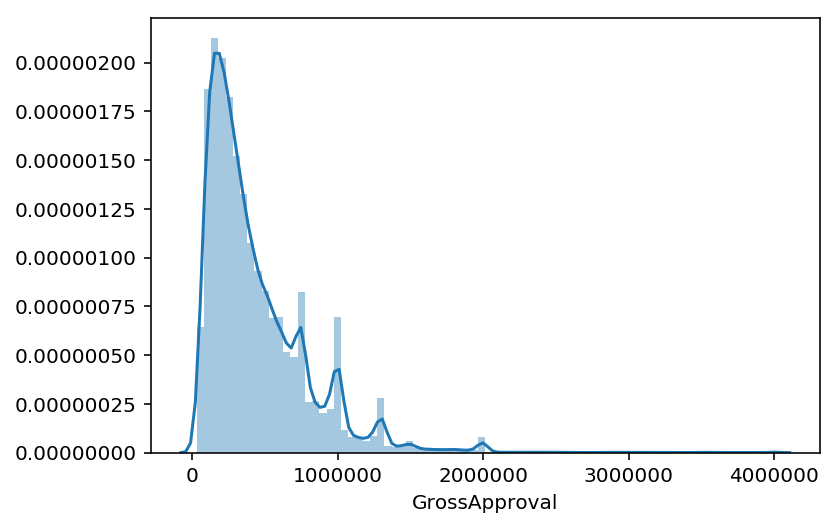

In [61]:
vis1 = sns.distplot(rawdata["GrossApproval"], bins = 80)

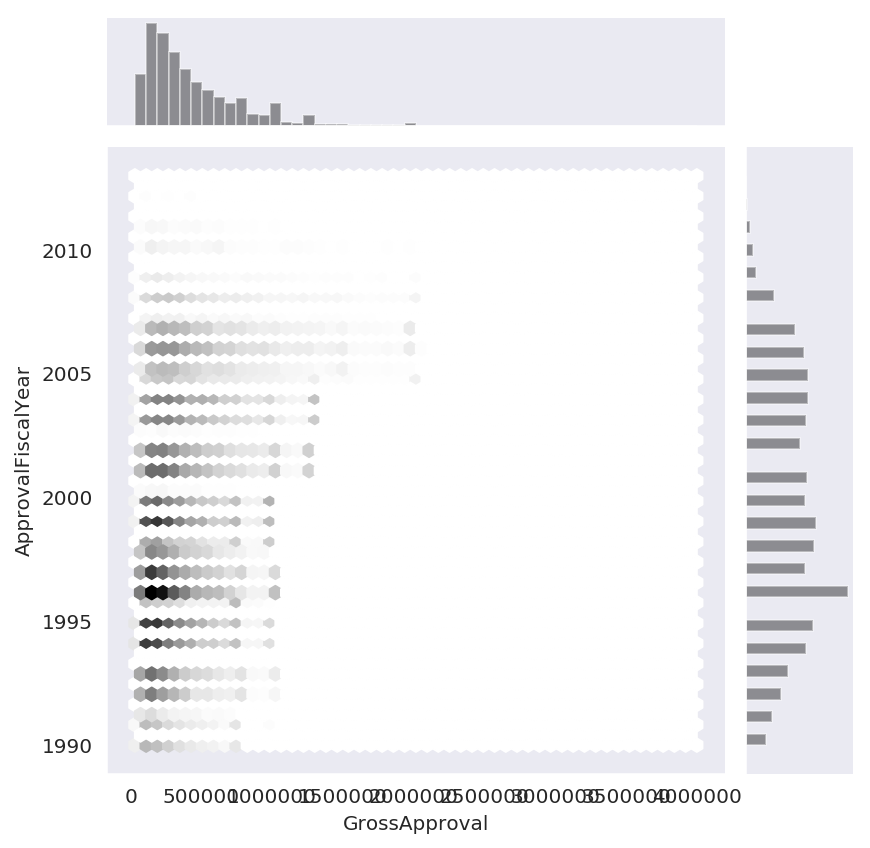

In [62]:
with sns.axes_style("dark"):
    sns.jointplot(data = rawdata, x = "GrossApproval", y = "ApprovalFiscalYear", kind="hex", color="k")

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


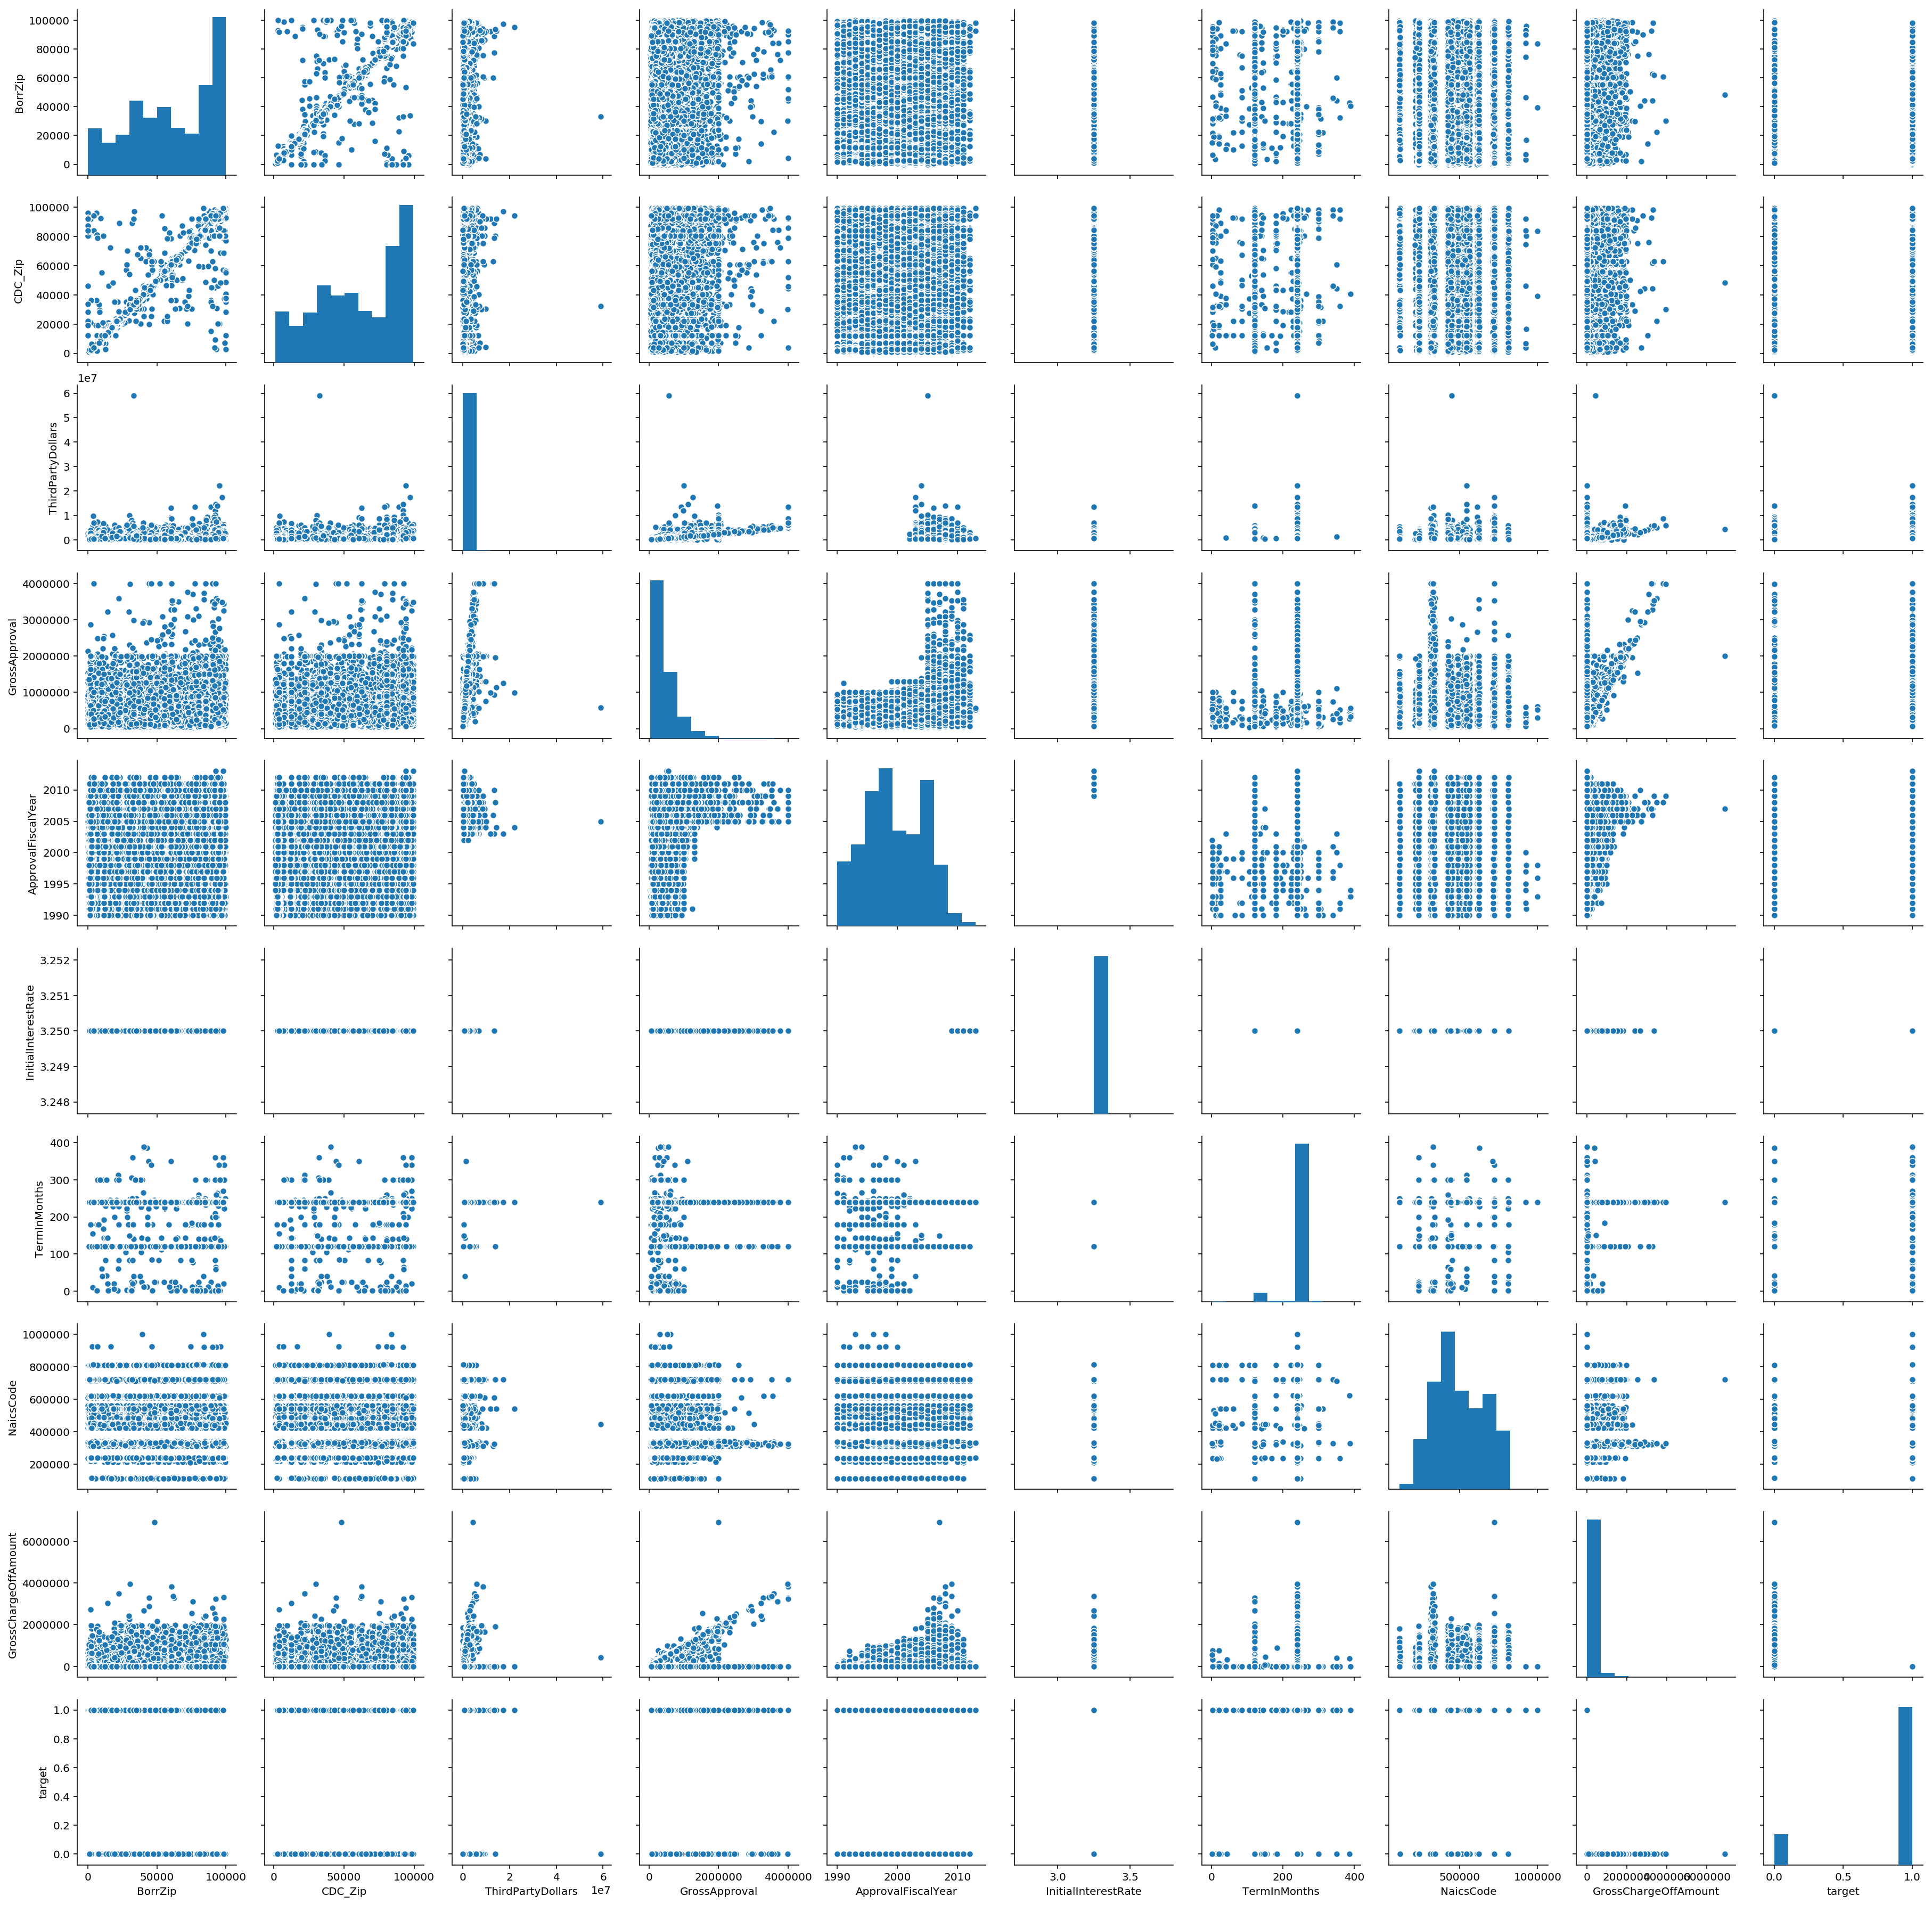

In [13]:
sns.pairplot(rawdata)

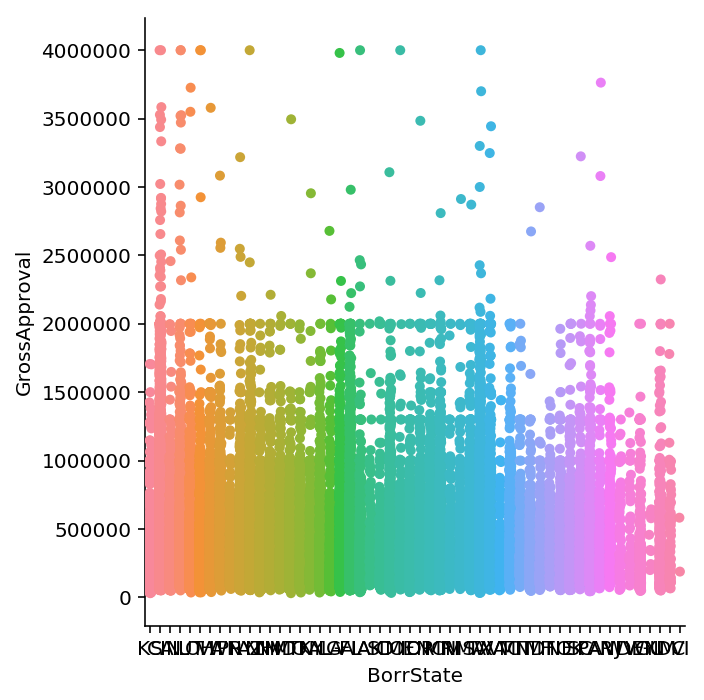

In [14]:
sns.catplot(x = "BorrState", y = "GrossApproval", data = rawdata)

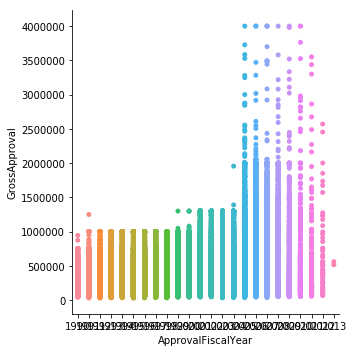

In [11]:
sns.catplot(x = "ApprovalFiscalYear", y = "GrossApproval", data = rawdata, jitter = False)

In [63]:
# add feature GSP in the borrower state and year
state = pd.read_csv('/Users/kristen/Desktop/state.csv',header = None)
state.set_index(0,inplace = True)
statedict = state.to_dict()[1]
statedict['District of Columbia'] = 'DC'
statedict['Puerto Rico'] = 'PR'
statedict['Guam'] = 'GU'
gsp = pd.read_excel('/Users/kristen/Desktop/GSP.xls')
gsp['state'] = gsp['GeoName'].map(lambda x: statedict[x] if x in statedict else '')
gsp.set_index('state',inplace = True)
gsp_pr = pd.read_excel('/Users/kristen/Desktop/GSP-PR.xls')
gsp_pr['ind'] = gsp_pr['year'].map(lambda x: str(x)[:4])
gsp_pr.set_index('ind',inplace = True)

In [64]:
Borrgsp = []
BorrState = list(rawdata['BorrState'])
ProjectState = list(rawdata['ProjectState'])
year = list(rawdata['ApprovalFiscalYear'])
for i in range(len(year)):
    if BorrState[i] == 'PR':
        Borrgsp.append(gsp_pr.loc[str(year[i]),'GSP'])
    else:
        Borrgsp.append(gsp.loc[BorrState[i],str(year[i])] if BorrState[i] in gsp.index else 0)
rawdata['Borrgsp'] = Borrgsp

In [65]:
# add feature unemployment rate in the borrower state and year & project state and year
import re
unemploydict = {}
with open('/Users/kristen/Desktop/unemply_dict.txt') as file:
    lines = file.readlines()

for i in range(len(lines)):
    if i%2 == 0:
        line = lines[i]
        state = re.search('(wide )(.+)(Season)',line).group(2)
        state = state[:(len(state)//2)][:-1]
        unemploydict[re.search('LASST(\w+)',line).group(0)] = state
#print(unemploydict)       

In [66]:
unemply_all = pd.read_excel('/Users/kristen/Desktop/unemploy_all.xlsx')
flag = unemply_all['Series ID'].map(lambda x: x in unemploydict)
unemply_all['flag'] = flag
unemply_all = unemply_all[unemply_all['flag'] == True]
unemply_all['state'] = unemply_all['Series ID'].map(lambda x: statedict[unemploydict[x]])
unemply_all.set_index('state',inplace = True)
month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for y in range(1990,2014):
    cols = [m+'\n'+str(y) for m in month]
    unemply_all[y] = list(unemply_all.loc[:,cols].mean(axis=1))

In [67]:
#unemply_all.head()

In [68]:
unemploy_bow = []
for i in range(len(year)):
    unemploy_bow.append(unemply_all.loc[BorrState[i],year[i]] if BorrState[i] in unemply_all.index else 0)
rawdata['unemploy_bow'] = unemploy_bow

In [69]:
ProjectState = list(rawdata['ProjectState'])
unemploy_pro = []
for i in range(len(year)):
    unemploy_pro.append(unemply_all.loc[ProjectState[i],year[i]] if ProjectState[i] in unemply_all.index else 0)
rawdata['unemploy_pro'] = unemploy_pro

In [70]:
# add feature S&P 500
SP = pd.read_excel('/Users/kristen/Desktop/SP500.xlsx')
spyear = SP['year'].map(lambda s: str(s)[:4])
SP.drop(['year'],axis=1)
SP['year'] = spyear
SP.set_index('year',inplace=True)
SP500 = []
for i in range(len(year)):
    SP500.append(SP.loc[str(year[i]),'SP'])
rawdata['SP500'] = SP500

In [71]:
# add feature borrower state != bank state

rawdata['borr=bank'] = rawdata['BorrState'] == rawdata['ThirdPartyLender_State']

In [72]:
# add feature borrower state != project state

rawdata['borr=pro'] = rawdata['BorrState'] == rawdata['ProjectState']

In [73]:
# add feature borrower state != CDC state
rawdata['borr=CDC'] = rawdata['BorrState'] == rawdata['CDC_State']

In [74]:
rawdata.head()

,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,CDC_Name,CDC_Street,CDC_City,CDC_State,CDC_Zip,...,ChargeOffDate,GrossChargeOffAmount,target,Borrgsp,unemploy_bow,unemploy_pro,SP500,borr=bank,borr=pro,borr=CDC
0,ROBERT G. FIELDS AND MARY D. F,55 & RICHLAND,KANSAS CITY,KS,66106,Avenue Area Incorporated,3324 Emerald Lane,Jefferson City,MO,65109.0,...,NaT,0.0,1,51873.7,4.316667,4.316667,339.97,False,True,False
1,CANDLELAMP COMPANY,3454 NIKI WAY,RIVERSIDE,CA,92507,CDC Small Business Finance Cor,2448 Historic Decatur,San Diego,CA,92106.0,...,NaT,0.0,1,773460.0,5.783333,5.783333,339.97,False,True,True
2,"NATIONAL COMPOSITES, INC.",2303 N. BENDIX DRIVE,SOUTH BEND,IN,46628,Business Development Corporati,218 W. Washington Street,South Bend,IN,46601.0,...,NaT,0.0,1,110859.6,5.300000,5.300000,339.97,False,True,True
3,WENDY'S OF HARRISBURG,OUTLOT A. TR. 45N & SMALL ST,HARRISBURG,IL,62946,Small Business Growth Corporat,2401 West White Oaks Drive,Springfield,IL,62704.0,...,2003-03-28,0.0,0,279019.1,6.191667,6.191667,339.97,False,True,True
6,"ROCKY MTN EMPLOYE BENEFTS, INC",3200 S. 700 E.,SALT LAKE CITY,UT,84106,Mountain West Small Business F,2595 East 3300 South,Salt Lake City,UT,84109.0,...,NaT,0.0,1,31249.3,4.408333,4.408333,339.97,False,True,True


In [75]:
# log transformation
logcols = ['GrossApproval','ThirdPartyDollars','SP500']
for col in logcols:
    rawdata[col] = np.log(rawdata[col])
borrgsp = list(rawdata['Borrgsp'])
logborrgsp = []
for i in range(len(borrgsp)):
    if i == 0:
        logborrgsp.append(0)
    else:
        logborrgsp.append(np.log(i))

In [76]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54806 entries, 0 to 140496
Data columns (total 37 columns):
BorrName                  54806 non-null object
BorrStreet                54798 non-null object
BorrCity                  54806 non-null object
BorrState                 54806 non-null object
BorrZip                   54806 non-null int64
CDC_Name                  54806 non-null object
CDC_Street                54614 non-null object
CDC_City                  54614 non-null object
CDC_State                 54614 non-null object
CDC_Zip                   54614 non-null float64
ThirdPartyLender_Name     16953 non-null object
ThirdPartyLender_City     16953 non-null object
ThirdPartyLender_State    17068 non-null object
ThirdPartyDollars         16881 non-null float64
GrossApproval             54806 non-null float64
ApprovalDate              54806 non-null datetime64[ns]
ApprovalFiscalYear        54806 non-null int64
DeliveryMethod            54806 non-null object
subpgmdesc       

In [77]:
numRow = len(rawdata)
def checkCol(df, colName, numRow, isCata = True):
    print(colName, ':')
    print('Any NA?: ', df[colName].isnull().values.any())
    if df[colName].isnull().values.any():
        numNA = sum(df[colName].isnull().values)
        print ('    # of NA: ', numNA)
        print ('    NA%:     ', numNA/numRow)
    if isCata:
        levelList = df[colName].unique()
        print('Different levels: ', len(levelList), levelList)
        fillna(df, colName, isCata = True)
        
    else:
        print('range: ', min(df[colName].astype(float).dropna()), max(df[colName].astype(float).dropna()))
        fillna(df, colName, isCata = False)
        
def fillna(df, colName, isCata = True):
    if isCata:
        df[colName] = df[colName].fillna(0)
    else:
        df[colName] = df[colName].fillna('0')
    return df


In [78]:
catCols = ['BorrName', 'BorrStreet', 'BorrCity', 'BorrState','CDC_Name', 'CDC_Street', 'CDC_City', 'CDC_State', 'ThirdPartyLender_Name', 'ThirdPartyLender_City',
       'ThirdPartyLender_State','ApprovalDate', 'ApprovalFiscalYear', 'DeliveryMethod', 'subpgmdesc','NaicsCode', 'NaicsDescription',
       'ProjectCounty', 'ProjectState', 'BusinessType','BorrZip','CDC_Zip'] #22
numCols = ['ThirdPartyDollars', 'GrossApproval','InitialInterestRate','GrossChargeOffAmount', 'TermInMonths','Borrgsp','unemploy_bow','unemploy_pro','SP500','borr=bank','borr=pro','borr=CDC']
for col in catCols:
    checkCol(rawdata, col, numRow, isCata = True)
for col in numCols:
    checkCol(rawdata, col, numRow, isCata = False)

BorrName :
Any NA?:  False
Different levels:  52068 ['ROBERT G. FIELDS AND MARY D. F' 'CANDLELAMP COMPANY'
 'NATIONAL COMPOSITES, INC.' ... 'Master Precision Global, LLC'
 'Precision Electric Group, Inc.' 'Material Innovations, Incorpor']
BorrStreet :
Any NA?:  True
    # of NA:  8
    NA%:      0.0001459694194066343
Different levels:  53510 ['55 & RICHLAND' '3454 NIKI WAY' '2303 N. BENDIX DRIVE' ...
 '1212 Fairplains Street.' '7710 185th Avenue NE.' '17611 Metzler Lane.']
BorrCity :
Any NA?:  False
Different levels:  7442 ['KANSAS CITY' 'RIVERSIDE' 'SOUTH BEND' ... 'Sonoma' 'Vicksburg' 'Redmond']
BorrState :
Any NA?:  False
Different levels:  54 ['KS' 'CA' 'IN' 'IL' 'UT' 'OH' 'VA' 'WI' 'PR' 'NY' 'AZ' 'NH' 'NV' 'MD'
 'MO' 'TN' 'KY' 'AL' 'LA' 'GA' 'FL' 'IA' 'AK' 'SD' 'CO' 'ME' 'ID' 'OR'
 'NC' 'MN' 'RI' 'MS' 'MA' 'TX' 'WA' 'VT' 'MI' 'CT' 'ND' 'MT' 'HI' 'NE'
 'OK' 'SC' 'PA' 'AR' 'NJ' 'WV' 'DE' 'WY' 'GU' 'NM' 'DC' 'VI']
CDC_Name :
Any NA?:  False
Different levels:  296 ['Avenue Area Incorp

    # of NA:  192
    NA%:      0.0035032660657592233
Different levels:  275 ['Jefferson City' 'San Diego' 'South Bend' 'Springfield' 'Salt Lake City'
 'Columbus' 'Dayton' 'Petersburg' 'Monona' 'San Juan' 'Port Jervis'
 'Redding' 'Tuscon' 'Portsmouth' 'Las Vegas' 'Davis' nan 'Wichita'
 'La Habra' 'Redlands' 'Ogden' 'Modesto' 'Hillsboro' 'Frankfort'
 'Indianapolis' 'Montgomery' 'Shreveport' 'Albany' 'Atlanta' 'Kansas City'
 'Lake Worth' 'Birmingham' 'Johnston' 'Milwaukee' 'ANCHORAGE' 'Pierre'
 'Denver' 'Bangor' 'Des Moines' 'Macon' 'Liberty Township' 'Bakersfield'
 'Boise' 'Charlotte' 'Cincinnati' 'St. Cloud' 'Providence' 'Monroe'
 'Waltham' 'Fairfax' 'Tulare' 'Phoenix' 'Bethpage' 'DURHAM' 'Walnut Creek'
 'Austin' 'Seattle' 'North Bend' 'St. Johnsbury' 'Valdosta' 'Santa Ana'
 'Fresno' 'New Bern' 'Fort Worth' 'Dalton' 'Sturtevant' 'Gainesville'
 'Peoria' 'Akron' 'Brunswick' 'Twin Falls' 'North Highlands'
 'San Francisco' 'Brownsville' 'GRAND RAPIDS' 'Augusta' 'Hamden'
 'Cleveland' 'Richm

    # of NA:  37925
    NA%:      0.6919862788745758
range:  0.0 17.893429285104506
GrossApproval :
Any NA?:  False
range:  10.308952660644293 15.201804919084164
InitialInterestRate :
Any NA?:  True
    # of NA:  53926
    NA%:      0.9839433638652703
range:  3.25 3.25
GrossChargeOffAmount :
Any NA?:  False
range:  0.0 6911449.0
TermInMonths :
Any NA?:  False
range:  1.0 389.0
Borrgsp :
Any NA?:  False
range:  0.0 2262771.2
unemploy_bow :
Any NA?:  False
range:  0.0 17.000000000000004
unemploy_pro :
Any NA?:  False
range:  0.0 17.000000000000004
SP500 :
Any NA?:  False
range:  5.785331739210489 7.300067600512001
borr=bank :
Any NA?:  False
range:  0.0 1.0
borr=pro :
Any NA?:  False
range:  0.0 1.0
borr=CDC :
Any NA?:  False
range:  0.0 1.0


In [79]:
# transform data type
for col in catCols:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(rawdata[col].values.astype('str')))
    rawdata[col] = lbl.transform(list(rawdata[col].values.astype('str')))
    rawdata[col] = rawdata[col].astype('category')
rawdata['CDC_Zip'] = rawdata['CDC_Zip'].astype('category')
rawdata['BorrZip'] = rawdata['BorrZip'].astype('category')
rawdata['Borrgsp'] = rawdata['Borrgsp'].astype('float64')
rawdata['InitialInterestRate'] = rawdata['InitialInterestRate'].astype('float64')
rawdata['ThirdPartyDollars'] = rawdata['ThirdPartyDollars'].astype('float64')
rawdata['borr=pro'] = rawdata['borr=pro'].astype('int64')
rawdata['borr=bank'] = rawdata['borr=bank'].astype('int64')
rawdata['borr=CDC'] = rawdata['borr=CDC'].astype('int64')
rawdata.dtypes

BorrName                        category
BorrStreet                      category
BorrCity                        category
BorrState                       category
BorrZip                         category
CDC_Name                        category
CDC_Street                      category
CDC_City                        category
CDC_State                       category
CDC_Zip                         category
ThirdPartyLender_Name           category
ThirdPartyLender_City           category
ThirdPartyLender_State          category
ThirdPartyDollars                float64
GrossApproval                    float64
ApprovalDate                    category
ApprovalFiscalYear              category
DeliveryMethod                  category
subpgmdesc                      category
InitialInterestRate              float64
TermInMonths                       int64
NaicsCode                       category
NaicsDescription                category
ProjectCounty                   category
ProjectState    

In [80]:
rawdata.head()

,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,CDC_Name,CDC_Street,CDC_City,CDC_State,CDC_Zip,...,ChargeOffDate,GrossChargeOffAmount,target,Borrgsp,unemploy_bow,unemploy_pro,SP500,borr=bank,borr=pro,borr=CDC
0,39630,36093,3180,17,7795,19,176,112,25,185,...,NaT,0.0,1,51873.7,4.316667,4.316667,5.828857,0,1,0
1,8208,27147,5519,4,10957,38,146,212,5,276,...,NaT,0.0,1,773460.0,5.783333,5.783333,5.828857,0,1,1
2,32586,19039,6074,16,5075,31,125,224,16,124,...,NaT,0.0,1,110859.6,5.300000,5.300000,5.828857,0,1,1
3,50451,51009,2681,15,7395,245,145,227,15,174,...,2003-03-28,0.0,0,279019.1,6.191667,6.191667,5.828857,0,1,1
6,39820,25639,5714,46,9955,179,150,210,46,257,...,NaT,0.0,1,31249.3,4.408333,4.408333,5.828857,0,1,1


In [88]:
catCols = ['BorrName', 'BorrStreet', 'BorrCity', 'BorrState','CDC_Name', 'CDC_Street', 'CDC_City', 'CDC_State', 'ThirdPartyLender_Name', 'ThirdPartyLender_City',
       'ThirdPartyLender_State','ApprovalDate', 'ApprovalFiscalYear', 'DeliveryMethod', 'subpgmdesc','NaicsCode', 'NaicsDescription',
       'ProjectCounty', 'ProjectState', 'BusinessType','BorrZip','CDC_Zip'] #22
numCols = ['ThirdPartyDollars', 'GrossApproval','InitialInterestRate','GrossChargeOffAmount', 'TermInMonths','Borrgsp','unemploy_bow','unemploy_pro','SP500','borr=bank','borr=pro']


In [89]:
# split the data
y = list(rawdata['target'])
X = rawdata[numCols+catCols]
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2,random_state=1)
train_X, val_X, train_y, val_y = train_test_split(train_X,train_y,test_size=0.2,random_state=1)


## Baseline: Logistic Regression

In [91]:
# standardization and one-hot encoding
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numCols),
                                               ('cat', categorical_transformer, catCols)])
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

clf.fit(train_X, train_y)
print("model score: %.3f" % clf.score(val_X, val_y))
print(classification_report(val_y, clf.predict(val_X)))
print(roc_auc_score(val_y, clf.predict_proba(val_X)[:,1]))

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by St

model score: 0.968
              precision    recall  f1-score   support

           0       1.00      0.81      0.89      1843
           1       0.96      1.00      0.98      9119

   micro avg       0.97      0.97      0.97     10962
   macro avg       0.98      0.90      0.94     10962
weighted avg       0.97      0.97      0.97     10962

0.9462708575590952


/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.9527398312358746


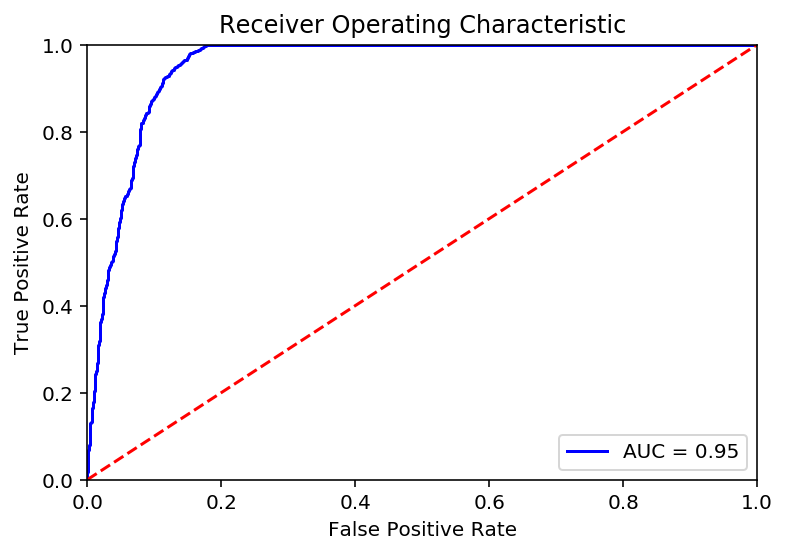

In [84]:
# ROC_AUC curve for logistic regression
probs = clf.predict_proba(val_X)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(val_y, preds)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Logistic Regression with Regularization

#### L1

In [225]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(penalty='l1'))])
clf.fit(train_X, train_y)
print("model score: %.3f" % clf.score(val_X, val_y))
print(classification_report(val_y, clf.predict(val_X)))
print(roc_auc_score(val_y, clf.predict_proba(val_X)[:,1]))

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by St

model score: 0.973
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      1408
           1       0.97      1.00      0.98      7361

   micro avg       0.97      0.97      0.97      8769
   macro avg       0.98      0.92      0.95      8769
weighted avg       0.97      0.97      0.97      8769

0.9560360538032135


#### L2

In [226]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(penalty='l2'))])

clf.fit(train_X, train_y)
print("model score: %.3f" % clf.score(val_X, val_y))
print(classification_report(val_y, clf.predict(val_X)))
print(roc_auc_score(val_y, clf.predict_proba(val_X)[:,1]))

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by St

model score: 0.970
              precision    recall  f1-score   support

           0       1.00      0.82      0.90      1408
           1       0.97      1.00      0.98      7361

   micro avg       0.97      0.97      0.97      8769
   macro avg       0.98      0.91      0.94      8769
weighted avg       0.97      0.97      0.97      8769

0.95271599940102


## Tree Models

### Gradient Boosting

In [137]:
def run_lgbc(train_X, train_y, val_X, val_y):
    params = {
        "objective" : "binary",
        "metric" : "binary_logloss", 
        "num_leaves" : 30,
        "min_child_samples" : 100,
        "learning_rate" : 0.1,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.5,
        "bagging_frequency" : 5,
        "bagging_seed" : 2018,
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    model = lgb.train(params, lgtrain, 1000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=100)

    pred_val_y = model.predict(val_X, num_iteration=model.best_iteration)
    return model, pred_val_y


In [138]:
modelC, pred_val_y = run_lgbc(train_X, train_y, val_X, val_y)
print(classification_report(val_y, modelC.predict(val_X)>0.5))
print(roc_auc_score(val_y, modelC.predict(val_X)))

C:\Users\THINKPAD\AppData\Local\Continuum\Anaconda3\envs\Tensor\lib\site-packages\lightgbm\basic.py:752: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.326888
Early stopping, best iteration is:
[34]	valid_0's binary_logloss: 0.313891
              precision    recall  f1-score   support

           0       0.68      0.40      0.51      1408
           1       0.89      0.96      0.93      7361

   micro avg       0.87      0.87      0.87      8769
   macro avg       0.79      0.68      0.72      8769
weighted avg       0.86      0.87      0.86      8769

0.8512693298372257


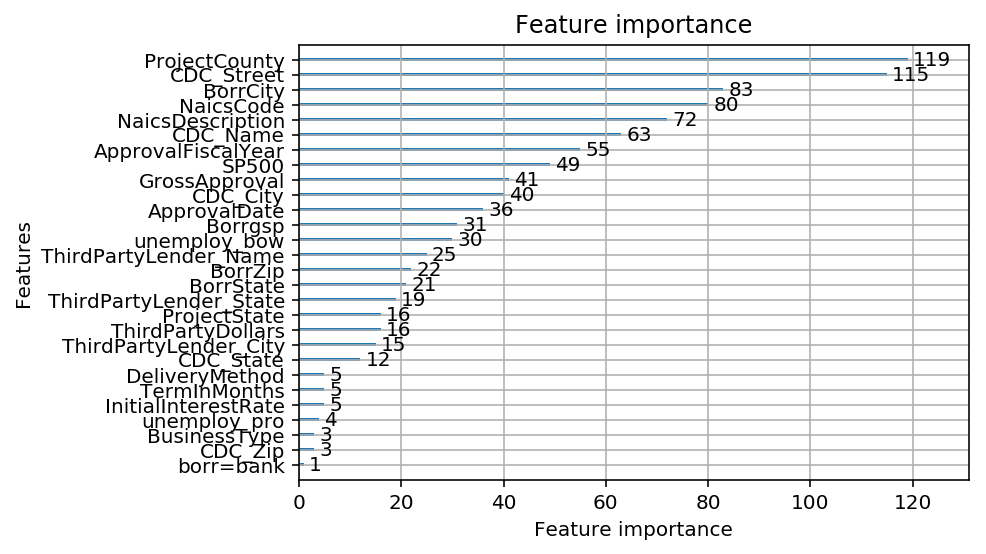

In [140]:
lgb.plot_importance(modelC)

## DNN

C:\Users\THINKPAD\AppData\Local\Continuum\Anaconda3\envs\Tensor\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\THINKPAD\AppData\Local\Continuum\Anaconda3\envs\Tensor\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


Cost after epoch 0: 17504.457699
Cost after epoch 100: 109.061628
Cost after epoch 200: 93.162514
Cost after epoch 300: 90.435052
Cost after epoch 400: 67.341103


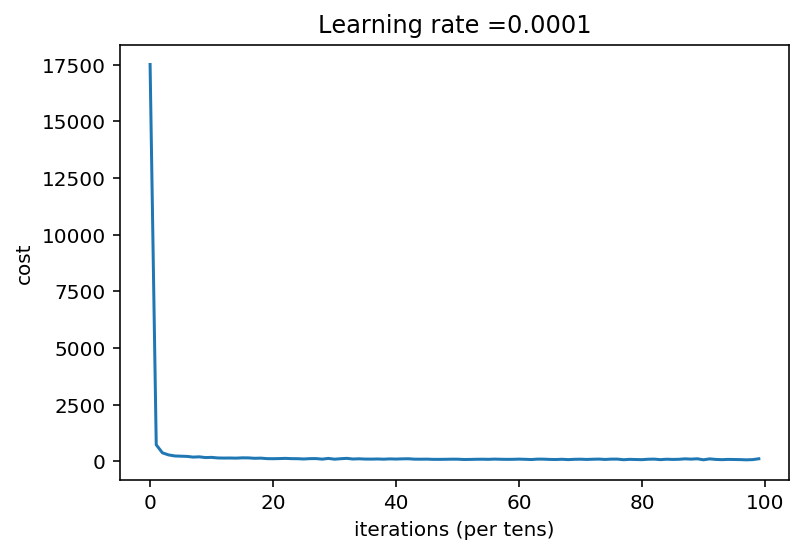

Parameters have been trained!
Train Accuracy: 0.8087812
Test Accuracy: 0.8065914


In [175]:
%run DNN_utils.py
#read your data in, remeber to use one_hot_encoding for your Y, otherwise TF will not work
DNNtrain_X = train_X.T.as_matrix()
DNNval_X = val_X.T.as_matrix()
DNNtrain_y = np.array(train_y).reshape(1,-1)
DNNval_y = np.array(val_y).reshape(1,-1)
DNNtrain_y = convert_to_one_hot(DNNtrain_y, 2)
DNNval_y = convert_to_one_hot(DNNval_y, 2)
parameters = model(DNNtrain_X, DNNtrain_y, DNNval_X, DNNval_y)

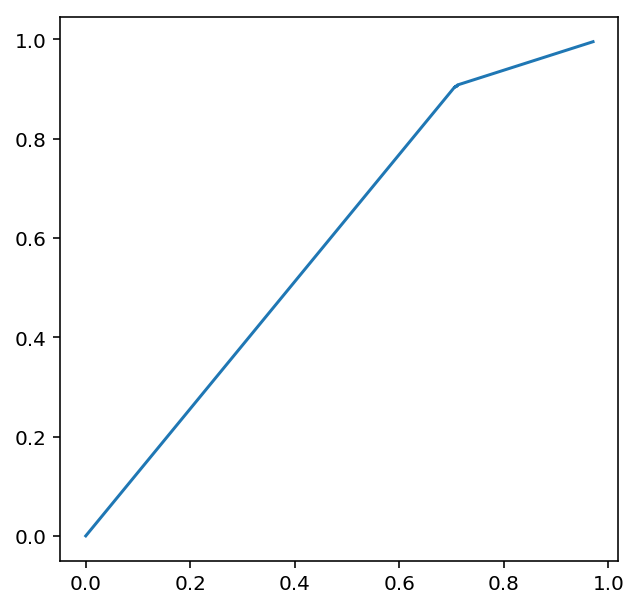

In [202]:
default_prob = get_probability(parameters, DNNval_X)[1,:]
n = 200
TPR = np.zeros((n,1))
FPR = np.zeros((n,1))
t = np.linspace(0.0, 1.0, n)
for i in range(n):
    TPR[i,0], FPR[i,0] = get_ROC(default_prob,t[i],DNNval_y[1,:])
plt.figure(figsize=(5,5))
plt.plot(FPR, TPR)

In [204]:
roc_auc_score(DNNval_y[1,:], default_prob)

0.6163920763297972